In [1]:
# import libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
# import dataset
survey_df = pd.read_csv("C:/Users/VenD/developer_survey_2017/survey_results_public.csv")
# print first 5 rows
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's Analyze Developers

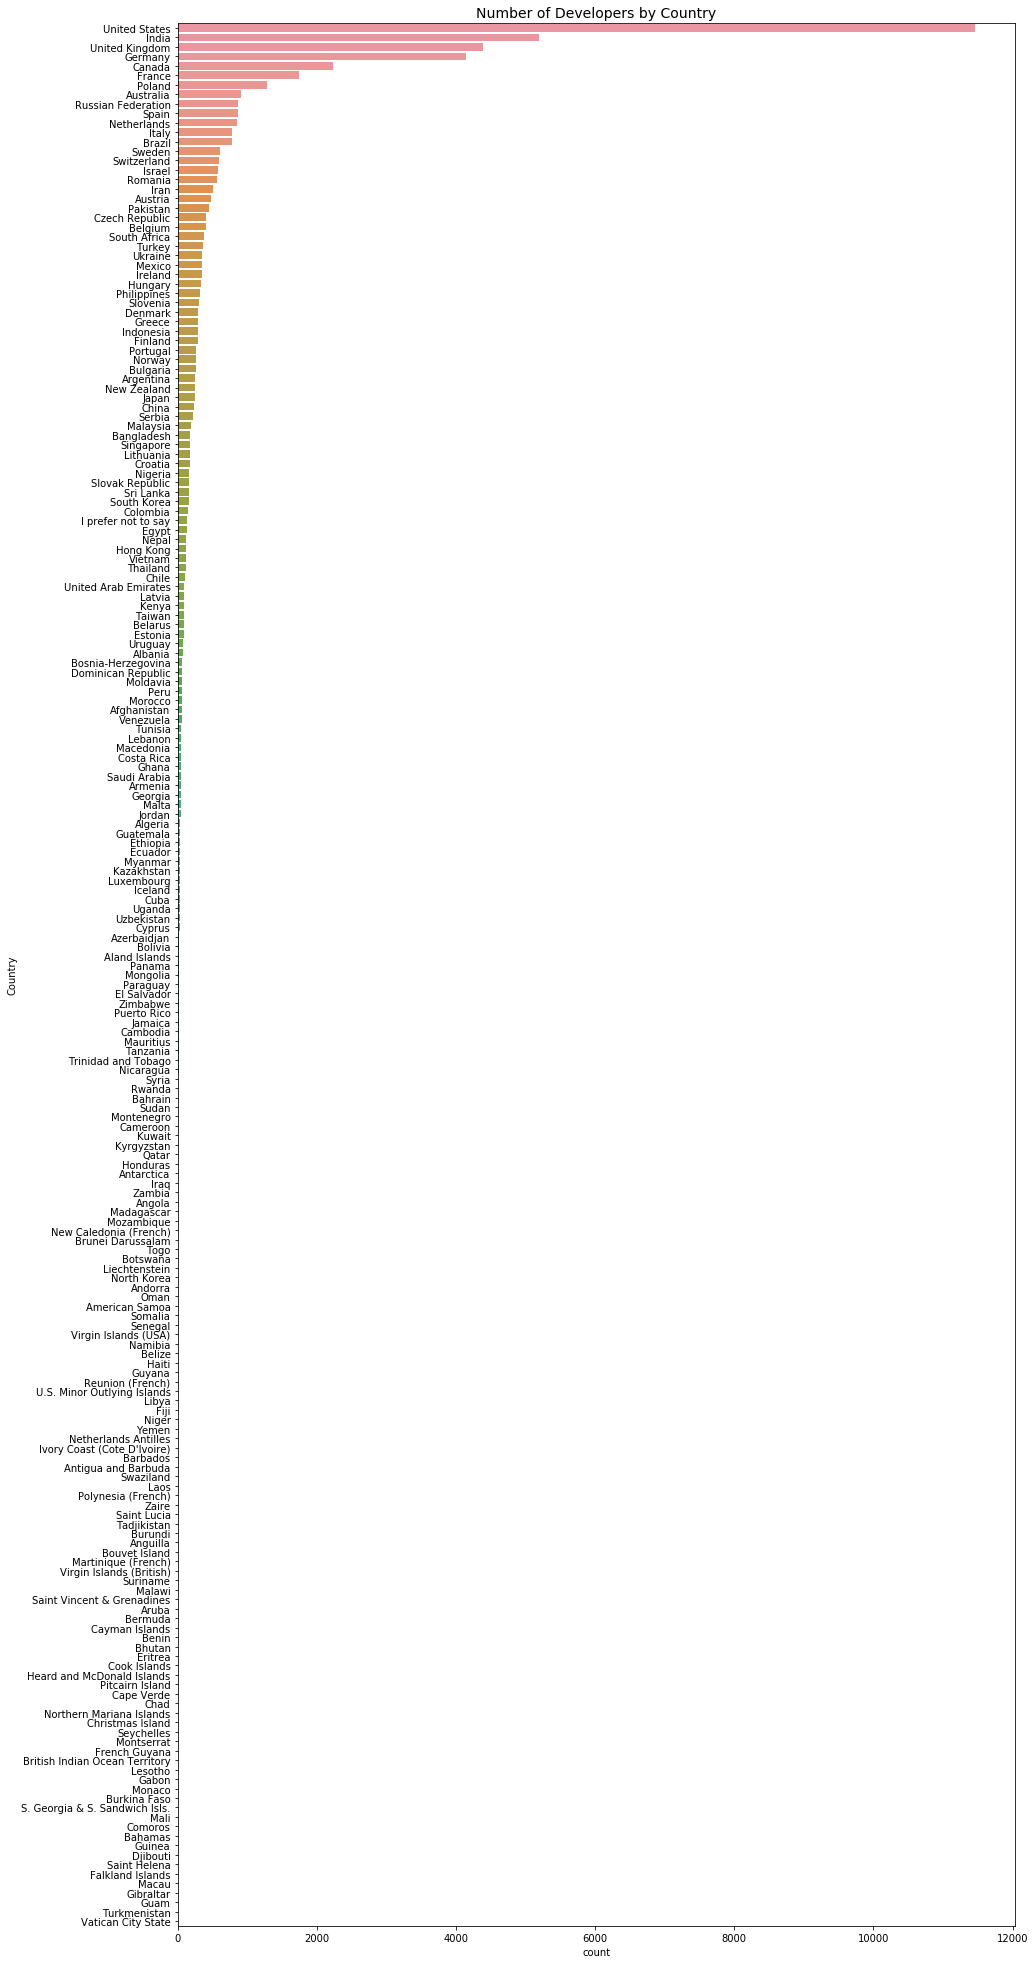

In [4]:
plt.subplots(figsize = (15, 35))
plt.title("Number of Developers by Country", fontsize = 14)
sns.countplot(y = survey_df.Country, order = survey_df.Country.value_counts().index)

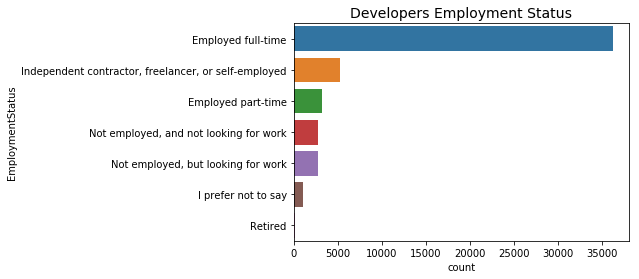

In [5]:
plt.title("Developers Employment Status", fontsize = 14)
sns.countplot(y = survey_df.EmploymentStatus, order = survey_df.EmploymentStatus.value_counts().index)

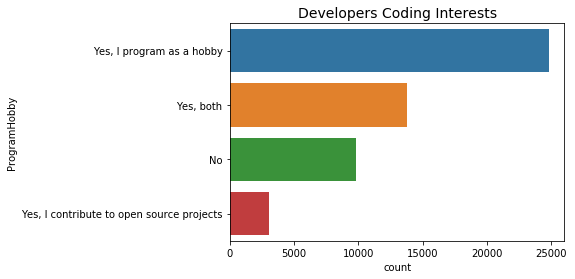

In [6]:
plt.title("Developers Coding Interests", fontsize = 14)
sns.countplot(y = survey_df.ProgramHobby, order = survey_df.ProgramHobby.value_counts().index)

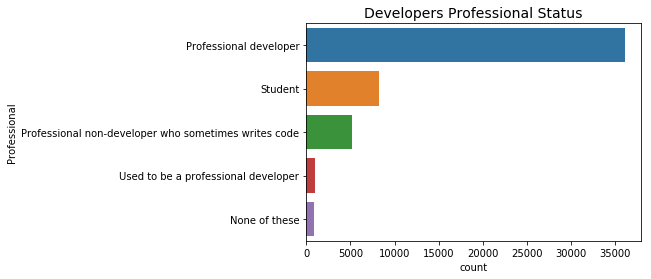

In [8]:
plt.title("Developers Professional Status", fontsize = 14)
sns.countplot(y = survey_df.Professional, order = survey_df.Professional.value_counts().index)

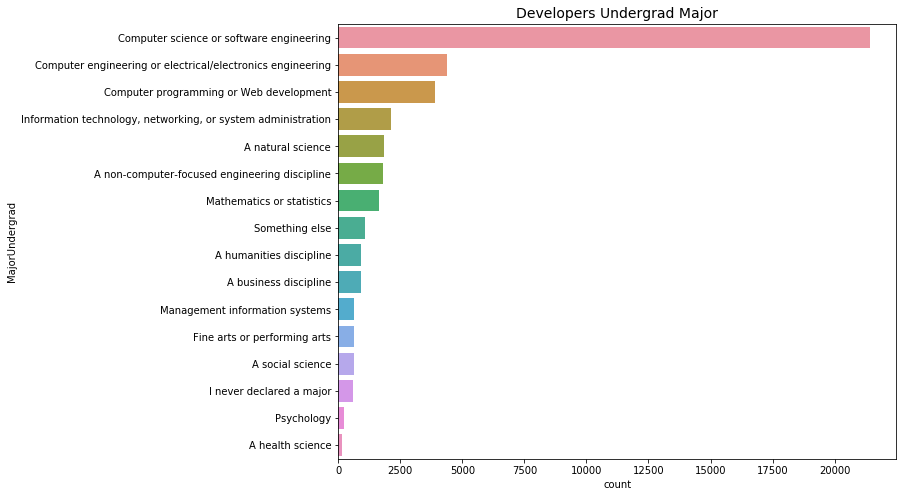

In [11]:
plt.subplots(figsize = (10, 8))
plt.title("Developers Undergrad Major", fontsize = 14)
sns.countplot(y = survey_df.MajorUndergrad, order = survey_df.MajorUndergrad.value_counts().index)

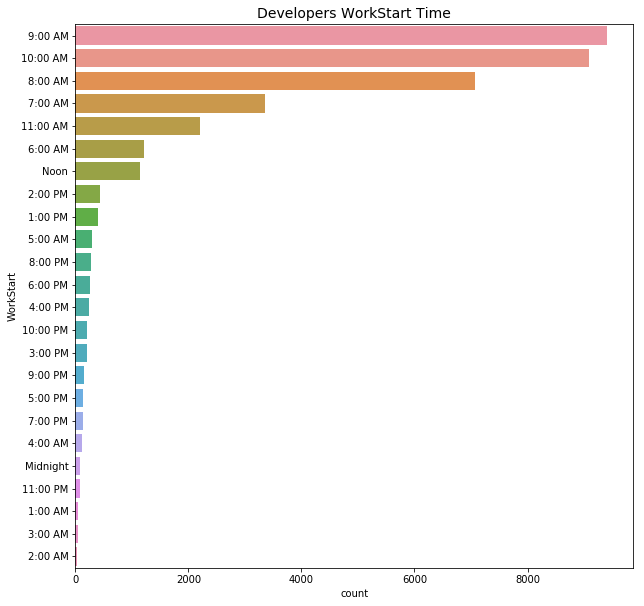

In [12]:
plt.subplots(figsize = (10, 10))
plt.title("Developers WorkStart Time", fontsize = 14)
sns.countplot(y = survey_df.WorkStart, order = survey_df.WorkStart.value_counts().index)

### Inferences

- Most developers on Stackoverflow are from United States.
- Developers willingly work on Stackoverflow because most of developers are full time employeed.
- Developers prefer to program as a Hobby instead of Open-Source Contribution.
- Majority of developers on Stackoverflow are CS major and professional.
- Most developers give priority to work in Morning over afternoon and evening.

## Analyze Developers Satisfaction

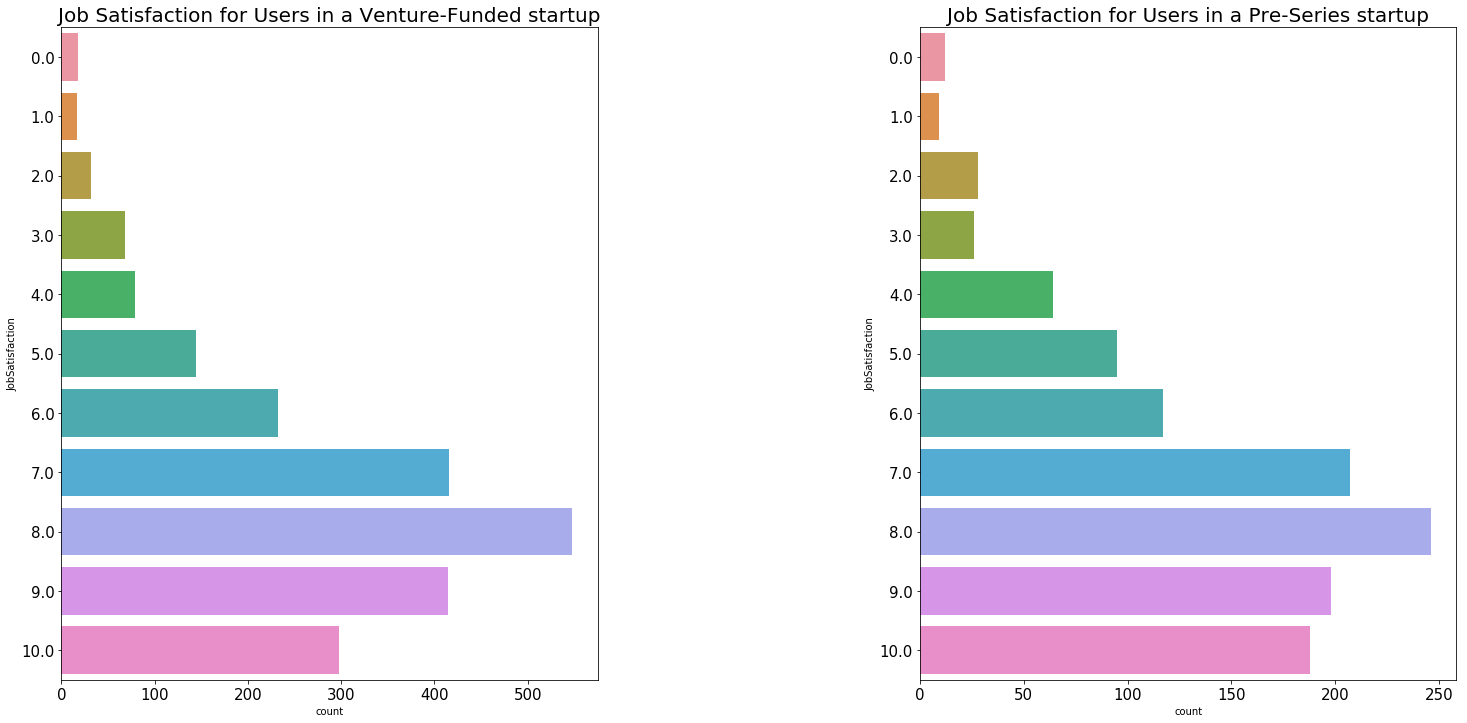

In [28]:
# lets check the satisfaction level of people working in startups
# Venture-funded startup, Pre-series A startup

dev_venture_funded = survey_df.loc[survey_df.CompanyType == "Venture-funded startup", 'JobSatisfaction']
dev_pre_series = survey_df.loc[survey_df.CompanyType == "Pre-series A startup", 'JobSatisfaction']

fig, ax = plt.subplots(1, 2, figsize = (25, 12))

sns.countplot(y = dev_venture_funded, ax = ax[0])
ax[0].set_title('Job Satisfaction for Users in a Venture-Funded startup', fontsize = 20)


sns.countplot(y = dev_pre_series, ax = ax[1])
ax[1].set_title('Job Satisfaction for Users in a Pre-Series startup', fontsize = 20)

plt.subplots_adjust(hspace = 0.1, wspace = 0.6)
ax[0].tick_params(labelsize = 15)
ax[1].tick_params(labelsize = 15)
plt.show()

In [19]:
# developerType vs JobSatisfaction
developers, job_satisfaction = [], []
temp_df = survey_df[['DeveloperType', 'JobSatisfaction']].dropna()
for i, d in enumerate(temp_df['DeveloperType']):
    devs = d.split(';')
    developers.extend(devs)
    for dev in devs:
        job_satisfaction.append(temp_df['JobSatisfaction'].iloc[i])
        
df = pd.DataFrame(data = {'DeveloperType': developers, 'Avg_JobSatisfaction': job_satisfaction})
df['DeveloperType'] = df['DeveloperType'].str.strip()

agg_df = pd.DataFrame(df.groupby(['DeveloperType'])['Avg_JobSatisfaction'].mean().sort_values(ascending = False)).reset_index()
agg_df

,DeveloperType,Avg_JobSatisfaction
0,Machine learning specialist,7.237170
1,DevOps specialist,7.216632
2,Other,7.182625
3,Graphics programming,7.182598
4,Data scientist,7.181252
5,Quality assurance engineer,7.156328
6,Systems administrator,7.107325
7,Embedded applications/devices developer,7.103965
8,Mobile developer,7.082764
9,Database administrator,7.073816


- Developers in Pre-Series startup are most satisfied as compare to Venture-Funded startup.
- Machine Learning specialist are the most satisfied developers while Desktop application developers are least satisfied with their jobs.

In [32]:
from collections import Counter

developer_types = []
temp = survey_df.DeveloperType.dropna()

for i in temp:
    dtypes = i.split(';')
    developer_types.extend(dtypes)
    
print(Counter(developer_types))

Counter({'Web developer': 26235, ' Desktop applications developer': 8571, ' Mobile developer': 5693, ' Database administrator': 5052, ' Systems administrator': 3973, ' DevOps specialist': 3783, ' Developer with a statistics or mathematics background': 3066, 'Mobile developer': 2633, ' Data scientist': 2594, ' Embedded applications/devices developer': 1927, 'Desktop applications developer': 1864, ' Other': 1520, 'Embedded applications/devices developer': 1425, ' Graphics programming': 1415, ' Graphic designer': 1413, 'Other': 1174, ' Quality assurance engineer': 1143, 'Developer with a statistics or mathematics background': 1025, ' Machine learning specialist': 984, 'Data scientist': 451, 'Machine learning specialist': 395, 'Graphics programming': 316, 'DevOps specialist': 232, 'Database administrator': 140, 'Systems administrator': 113, 'Quality assurance engineer': 109, 'Graphic designer': 13})


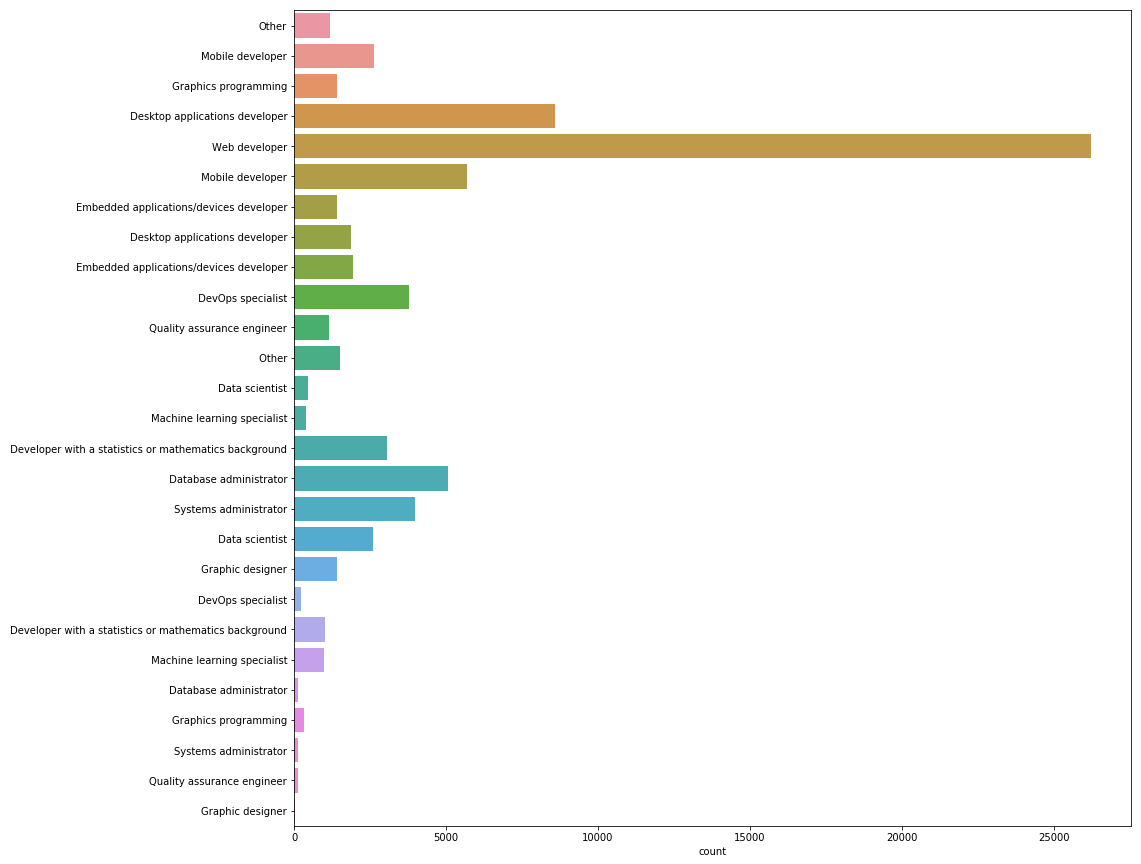

In [34]:
plt.subplots(figsize = (15, 15))
sns.countplot(y = developer_types)

- Majority of developers on Stackoverflow are Web Developers.

## Let's Analyze Programming Languages

In [15]:
from collections import Counter

language_types = []
temp = survey_df.HaveWorkedLanguage.dropna()

for i in temp:
    langtypes = i.split(';')
    language_types.extend(langtypes)

language_dict = Counter(language_types)
sorted_lang = sorted(language_dict, key = language_dict.get, reverse = True)

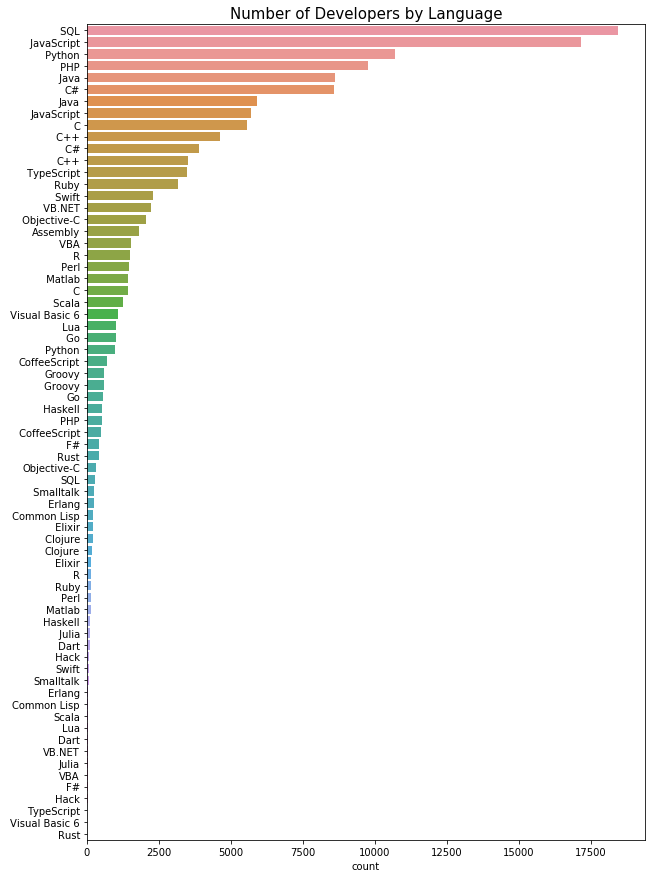

In [17]:
# Most Developers by Language
plt.subplots(figsize = (10, 15))
plt.title('Number of Developers by Language', fontsize = 15)
sns.countplot(y = language_types, order = sorted_lang)

In [18]:
temp_0 = survey_df.HaveWorkedLanguage.dropna()
temp_1 = survey_df.WantWorkLanguage.dropna()
    
p_features, p_feature_count = [], []
f_features, f_feature_count = [], []
top_lang = []
    
for i, j in zip(temp_0, temp_1):
    p_feature, f_feature = i.split(';'), j.split(';')
    p_features.extend(p_feature)
    f_features.extend(f_feature)
    
p_features_dict, f_features_dict = Counter(p_features),  Counter(f_features)

sorted_lang_names = sorted(f_features_dict, key = f_features_dict.get, reverse = True)

for lang in sorted_lang_names:
    top_lang.append(lang)
    p_feature_count.append(p_features_dict[lang])
    f_feature_count.append(f_features_dict[lang])
    
data = {'Languages': top_lang, 'Past_Developers_Count': p_feature_count, 'Future_Developers_Count': f_feature_count}
agg_df = pd.DataFrame(data)

diff = agg_df['Future_Developers_Count'] - agg_df['Past_Developers_Count']
pct_change = (diff / agg_df['Past_Developers_Count']) * 100
agg_df['Percent_Change (%)'] = pct_change

In [63]:
agg_df.head(15)

,Languages,Past_Developers_Count,Future_Developers_Count,Percent_Change (%)
0,JavaScript,15795,12804,-18.936372
1,Python,9774,11392,16.554123
2,SQL,16968,11094,-34.618105
3,C#,7939,6994,-11.903262
4,Java,7889,6273,-20.484219
5,TypeScript,3198,5530,72.920575
6,PHP,8985,5026,-44.062326
7,C++,3250,4337,33.446154
8,Swift,2093,4204,100.860010
9,Ruby,2894,3784,30.753283


In [71]:
# Create traces
trace0 = go.Scatter(
    x = agg_df.Languages[0:20],
    y = agg_df.Past_Developers_Count[0:20],
    mode = 'lines+markers',
    name = 'Past_Developers'
)

trace1 = go.Scatter(
    x = agg_df.Languages[0:20],
    y = agg_df.Future_Developers_Count[0:20],
    mode = 'lines+markers',
    name = 'Future_Developers'
)

data = [trace0, trace1]
layout = dict(title = "Future Language Trend and Developers Count Change")
    
fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'scatter-mode')

In [348]:
# Most Famous Languages By Country
from collections import Counter 

def get_most_used_language(country_name):
    languages = []
    temp_df = survey_df.loc[survey_df.Country == country_name]
    languages_sr = temp_df.HaveWorkedLanguage.dropna()
    for langs in languages_sr:
        languages.extend(langs.split(';'))
    dic = Counter(languages)
    top_langs = sorted(dic, key = dic.get, reverse = True)[0:5]
    
    return top_langs

In [350]:
l1, l2, l3, l4, l5 = [], [], [], [], []
v1, v2, v3, v4, v5 = [], [], [], [], []

langs = [l1, l2, l3, l4, l5]
vals = [v1, v2, v3, v4, v5]

c_dict = Counter(survey_df.Country)
countries = [c for c in sorted(c_dict, key = c_dict.get, reverse = True)]

for c in countries[:20]:
    top_langs = get_most_used_language(c)
    for index, l in enumerate(langs):
        l.append(top_langs[index])
        
data = {'Language1': langs[0],
        'Language2': langs[1],
        'Language3': langs[2],
        'Language4': langs[3],
        'Language5': langs[4]}


top_langs_df = pd.DataFrame(index = countries[:20], data = data)
top_langs_df

,Language1,Language2,Language3,Language4,Language5
United States,SQL,JavaScript,Python,C#,Java
India,SQL,JavaScript,PHP,Java,C
United Kingdom,SQL,JavaScript,C#,Python,PHP
Germany,SQL,JavaScript,PHP,Java,Python
Canada,SQL,JavaScript,Python,C#,Java
France,SQL,JavaScript,PHP,Python,Java
Poland,SQL,JavaScript,Python,PHP,C#
Australia,SQL,JavaScript,C#,Python,PHP
Russian Federation,SQL,JavaScript,Python,PHP,C#
Spain,SQL,JavaScript,PHP,Python,Java


In [353]:
data = []
labels = top_vals_df.index.values
lang_cols = list(top_langs_df.columns)
vals = [[10] * 20, [8] * 20, [6] * 20, [5] * 20, [3] * 20]

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

for i in range(len(val_cols)):
    trace = go.Bar(
        y = labels,
        x = vals[i],
        orientation = 'h',
        text = top_langs_df[lang_cols[i]],
        textposition = 'auto',
        textfont = dict(family='Arial', size=18, color = 'rgb(248, 248, 255)'),
        hoverinfo = 'none',
        marker = dict(
        color = colors[i],
        line = dict(
            color = 'rgb(248, 248, 249)',
            width = 1)
        )
    )
    
    data.append(trace)
    
layout = go.Layout(
    barmode = 'stack',
    width = 1000,
    height = 600,
    margin=go.layout.Margin(
        l = 150,
        r = 50,
        b = 30,
        t = 30,
        pad = 4
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'top-5-langs')

### Inferences

- Majority of developers on Stackoverflow are of **SQL**.
- JavaScript is the most preferred language but it's developers are reducing while Python is the 2nd most preferred language and its number of developers are increasing.

- SQL and JavaScript are the two top-most languages in most of the countries.

## Let's Analyze Salary 

In [20]:
# compare salaries with profession
developers, salaries = [], []
temp_df = survey_df[['DeveloperType', 'Salary']].dropna()
for i, d in enumerate(temp_df['DeveloperType']):
    devs = d.split(';')
    developers.extend(devs)
    for dev in devs:
        salaries.append(temp_df['Salary'].iloc[i])
        
df = pd.DataFrame(data = {'DeveloperType': developers, 'AvgSalary': salaries})
df['DeveloperType'] = df['DeveloperType'].str.strip()

agg_df = pd.DataFrame(df.groupby(['DeveloperType'])['AvgSalary'].mean().sort_values(ascending = False)).reset_index()
agg_df

,DeveloperType,AvgSalary
0,Other,72344.574448
1,DevOps specialist,66158.200598
2,Machine learning specialist,66023.099171
3,Developer with a statistics or mathematics bac...,62455.495840
4,Data scientist,61137.334460
5,Embedded applications/devices developer,58524.353375
6,Quality assurance engineer,56423.108379
7,Desktop applications developer,56352.857031
8,Systems administrator,56331.936263
9,Web developer,54968.020118


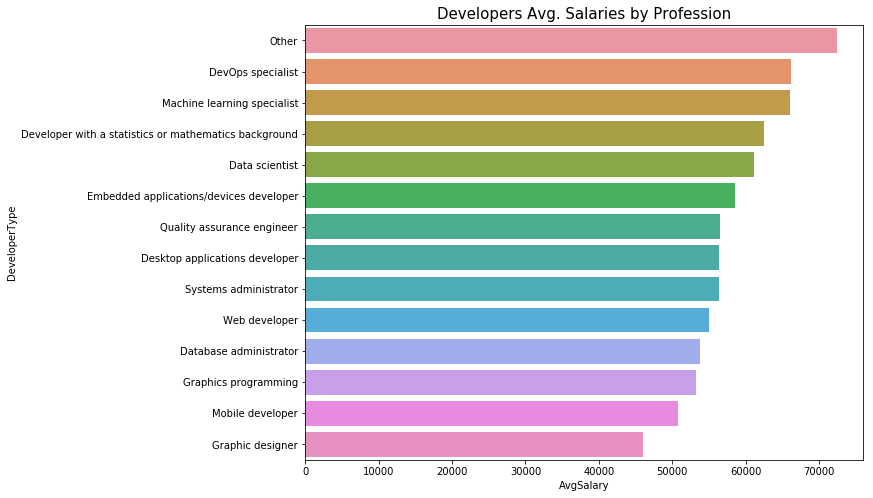

In [21]:
plt.subplots(figsize = (10, 8))
plt.title("Developers Avg. Salaries by Profession", fontsize = 15)
sns.barplot(x = agg_df.AvgSalary, y = agg_df.DeveloperType)

Average Expected Salary = 33142.22046770968


C:\Users\VenD\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



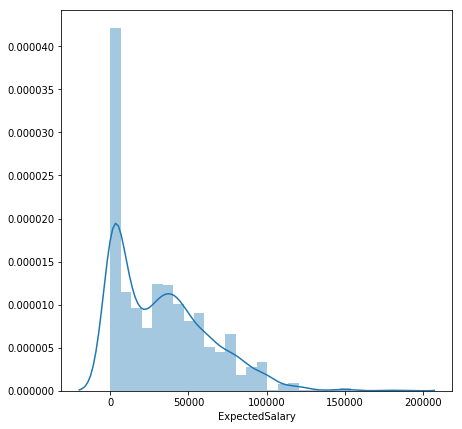

In [22]:
# Expected Salary of Students
students = survey_df.loc[survey_df.Professional == 'Student', 'ExpectedSalary'].dropna()
AverageSalary = students.mean()
print("Average Expected Salary = " + str(AverageSalary))

plt.subplots(figsize = (7, 7))
sns.distplot(students)

### Inferences

- DevOps and Machine Learning are top two highes paid salary fields.
- Students expected avg. salary is quite less than professional developers and this is trend in industry as well.

## Analyze Web Developers

In [23]:
WebDevs = survey_df[survey_df.WebDeveloperType.notnull()]

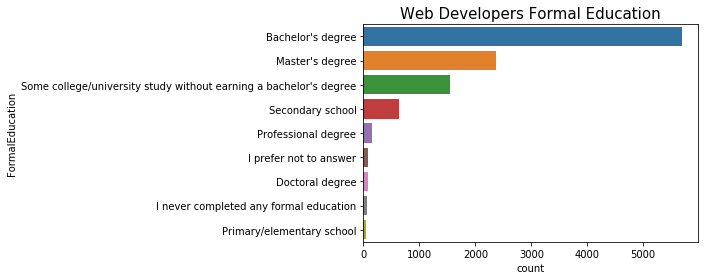

In [24]:
# formal Education of WebDevs
plt.title("Web Developers Formal Education", fontsize = 15)
sns.countplot(y = WebDevs.FormalEducation, order = WebDevs.FormalEducation.value_counts().index)

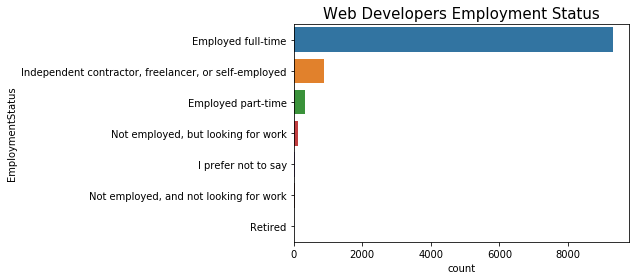

In [25]:
# Employment of Web Developers
plt.title("Web Developers Employment Status", fontsize = 15)
sns.countplot(y = WebDevs.EmploymentStatus, order = WebDevs.EmploymentStatus.value_counts().index)

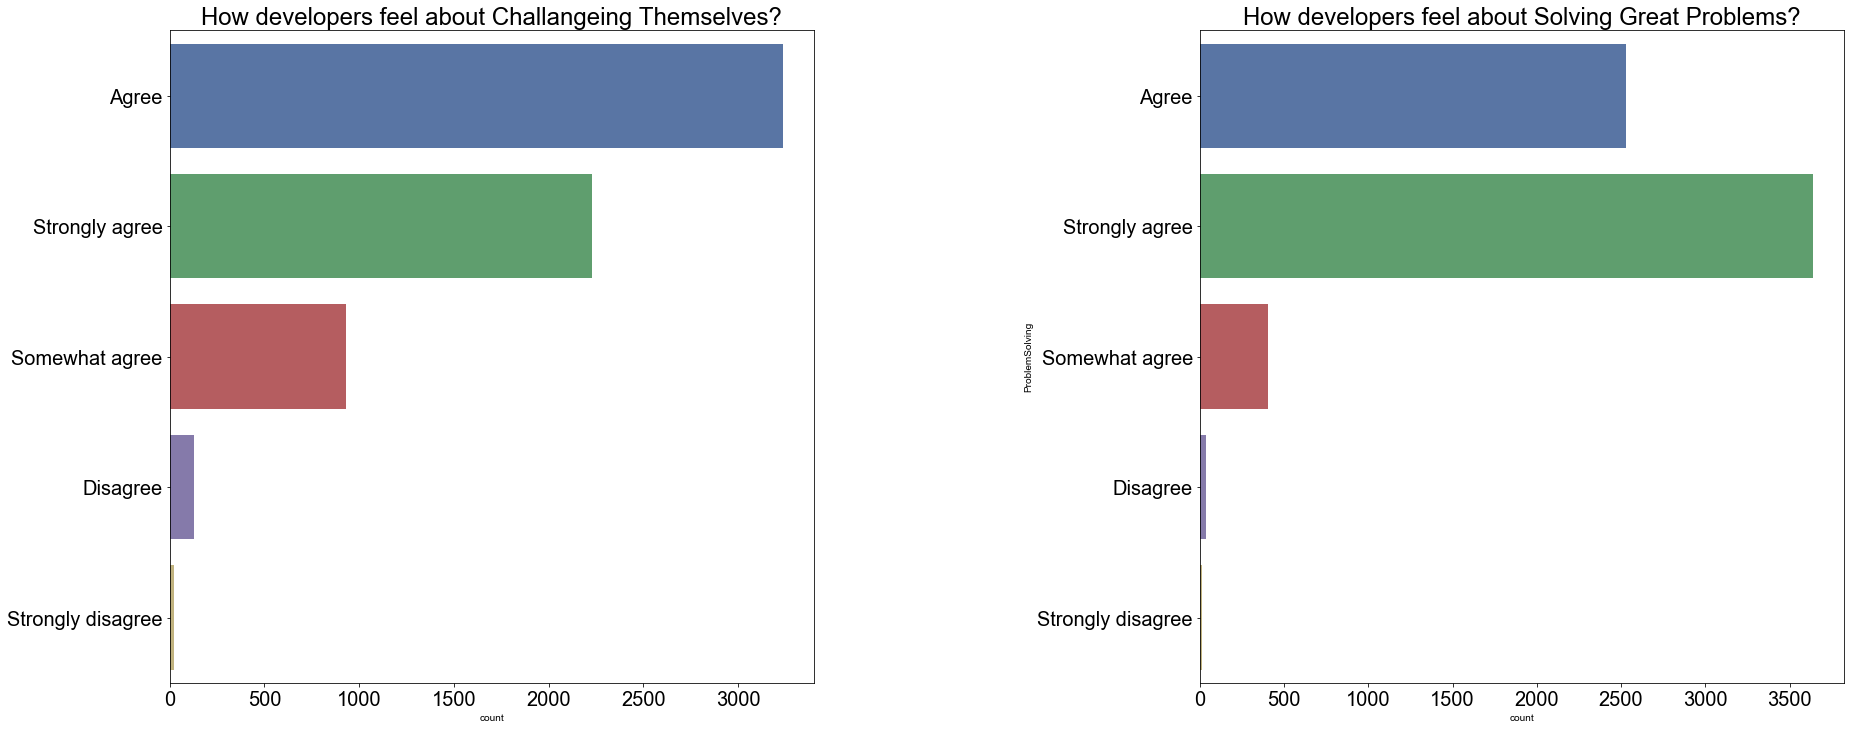

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (30, 12))
sns.set(font_scale = 2)

challange_myself = WebDevs.ChallengeMyself.dropna()
sns.countplot(y = challange_myself.values, ax = ax[0])
ax[0].set_title('How developers feel about Challangeing Themselves?')

problem_solving = WebDevs.ProblemSolving.dropna()
sns.countplot(y = problem_solving, ax = ax[1])
ax[1].set_title('How developers feel about Solving Great Problems?')

plt.subplots_adjust(hspace = 0.1, wspace = 0.6)
ax[0].tick_params(labelsize = 20)
ax[1].tick_params(labelsize = 20)
plt.show()

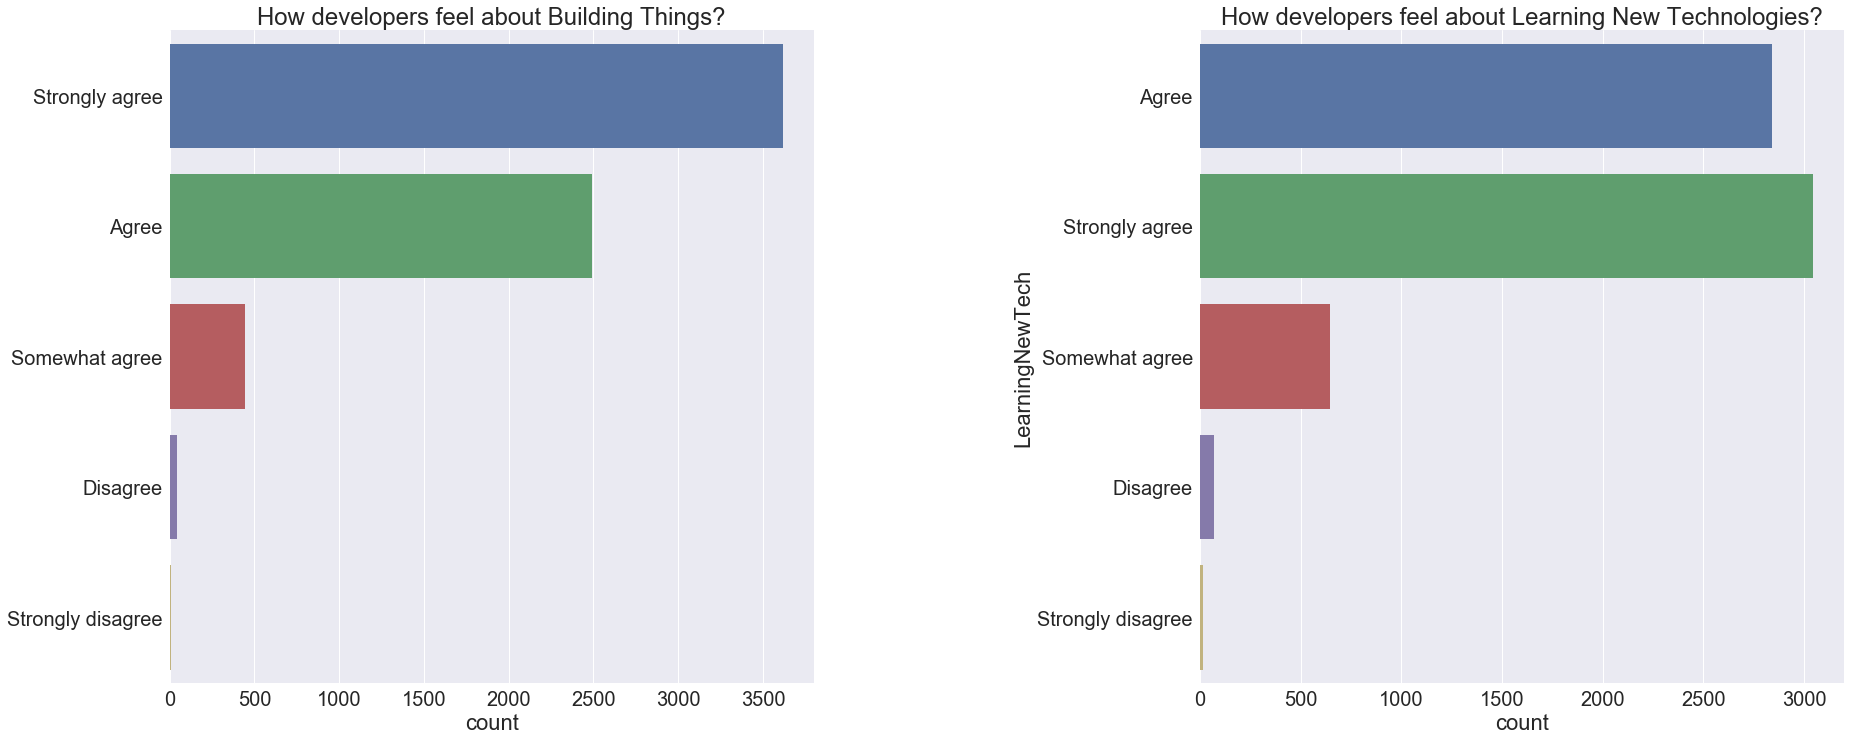

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (30, 12))
sns.set(font_scale = 2)

building_things = WebDevs.BuildingThings.dropna()
sns.countplot(y = building_things.values, ax = ax[0])
ax[0].set_title('How developers feel about Building Things?')

learning_new_tech = WebDevs.LearningNewTech.dropna()
sns.countplot(y = learning_new_tech, ax = ax[1])
ax[1].set_title('How developers feel about Learning New Technologies?')

plt.subplots_adjust(hspace = 0.1, wspace = 0.6)
ax[0].tick_params(labelsize = 20)
ax[1].tick_params(labelsize = 20)
plt.show()

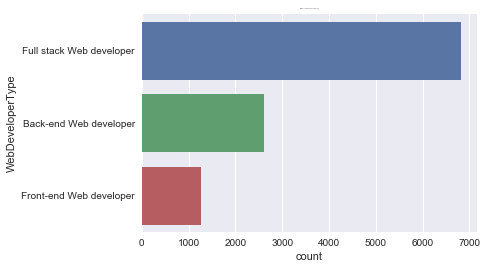

In [31]:
plt.subplots(figsize = (6, 4))
sns.set(font_scale = 0)
plt.title("Number of WebDevelopers by CategoryType")
sns.countplot(y = WebDevs.WebDeveloperType, order = WebDevs.WebDeveloperType.value_counts().index)

In [32]:
devs = Counter(WebDevs.WebDeveloperType.values)
labels = list(devs.keys())
values = list(devs.values())

trace = go.Pie(labels = labels, values = values)

py.iplot([trace], filename = 'devs_by_category')

In [33]:
salary_df = WebDevs[['Salary', 'WebDeveloperType']].groupby('WebDeveloperType').describe()
salary_df = salary_df.Salary
salary_df = salary_df.drop(['count', 'std', 'min', '25%', '50%', '75%'], axis = 1)
salary_df

,mean,max
WebDeveloperType,,
Back-end Web developer,51103.242190,185000.0
Front-end Web developer,51236.587277,170000.0
Full stack Web developer,55237.946123,195000.0


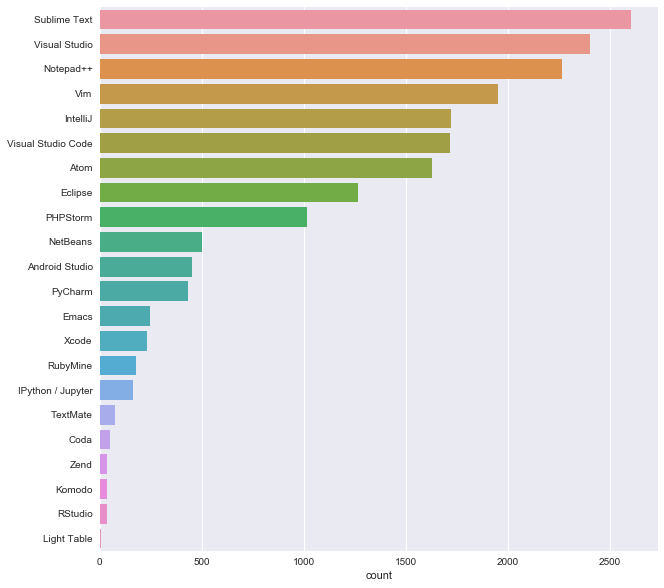

In [45]:
# tools used by Web Developers
sns.set(font_scale = 1)
IDEs = []
temp = WebDevs.IDE.dropna()

for d in temp:
    ide = d.split(';')
    IDEs.extend(ide)
    
IDEs = [ide.strip() for ide in IDEs]

dic = Counter(IDEs)
ordered_ide = sorted(dic, key = dic.get, reverse = True)
        
plt.subplots(figsize = (10, 10))
sns.countplot(y = IDEs, order = ordered_ide)

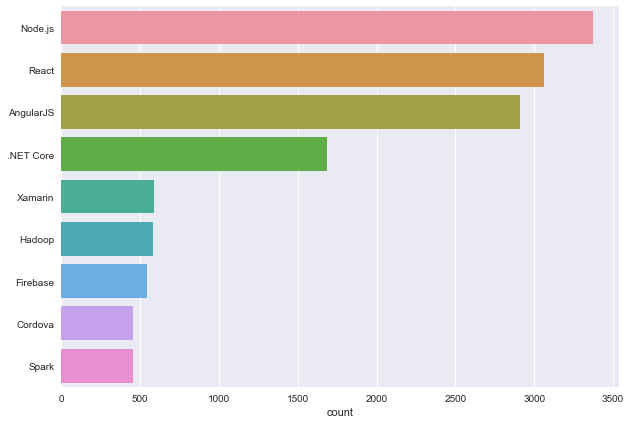

In [46]:
# Web Developer's preferred Frameworks

frameworks = []
temp = WebDevs.WantWorkFramework.dropna()

for f in temp:
    fw = f.split(';')
    frameworks.extend(fw)
    
frameworks = [fw.strip() for fw in frameworks]
    
dic = Counter(frameworks)
ordered_fw = sorted(dic, key = dic.get, reverse = True)
        
plt.subplots(figsize = (10, 7))
sns.countplot(y = frameworks, order = ordered_fw)

### Inferences

- Most of the web developers have Bachelor's degree.
- Developers prefer to solve great problems instead of challanging themselves.
- Majority of web developers and highest paid web developers are full stack developers.
- SublimeText and Visual Studio Code are the most used IDE's by web developers.
- Nodejs is most used backend framework and Reactjs is most used frontend framework by web developers.